# Brazilian E-Commerce Public Dataset by Olist

This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

## Choosing a domain
The domain is e-commerce.

## Describing our hypotheses and data sets
The dataset is composed of 6 tables (csv files): customers dataset, order items dataset, order payments dataset, orders dataset, products dataset, and product category names. They include different types of data, such as time series data, geographical data, and derived data.
Our hypothesis is related to customer segmentation: analyse customer demographics, such as city, to segment the customer database to identify top performing cities. This analysis can improve customer targeting.

In [30]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('data/olist_customers_dataset.csv')
items = pd.read_csv('data/olist_order_items_dataset.csv')
payments = pd.read_csv('data/olist_order_payments_dataset.csv')
orders = pd.read_csv('data/olist_orders_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
names = pd.read_csv('data/product_category_name_translation.csv')

In [31]:
customers[['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']].shape

(99441, 4)

In [32]:
items[['order_id', 'product_id', 'price']].shape

(112650, 3)

In [33]:
payments[['order_id', 'payment_type']].shape

(103886, 2)

In [34]:
orders[['order_id','customer_id','order_purchase_timestamp']].shape

(99441, 3)

In [35]:
products[['product_id', 'product_category_name']].shape

(32951, 2)

In [36]:
names.shape

(71, 2)

## Joining the datasets

In [37]:
product_names = pd.DataFrame()
product_names = pd.merge(products[['product_id', 'product_category_name']],names, on="product_category_name")
items_and_names = pd.DataFrame()
items_and_names = pd.merge(items[['order_id', 'product_id', 'price']],product_names[['product_id', 'product_category_name_english']], on="product_id")
items_names_payments = pd.DataFrame()
items_names_payments = pd.merge(items_and_names,payments[['order_id', 'payment_type']], on="order_id")
items_names_payments_orders = pd.DataFrame()
items_names_payments_orders = pd.merge(items_names_payments,orders[['order_id','customer_id','order_purchase_timestamp']], on="order_id")
all = pd.DataFrame()
all = pd.merge(items_names_payments_orders,customers[['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']], on="customer_id")
all.head()

,order_id,product_id,price,product_category_name_english,payment_type,customer_id,order_purchase_timestamp,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,credit_card,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,28013,campos dos goytacazes,RJ
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,55.9,cool_stuff,boleto,e6eecc5a77de221464d1c4eaff0a9b64,2017-06-28 11:52:20,75800,jatai,GO
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,64.9,cool_stuff,credit_card,4ef55bf80f711b372afebcb7c715344a,2018-05-18 10:25:53,30720,belo horizonte,MG
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,credit_card,30407a72ad8b3f4df4d15369126b20c9,2017-08-01 18:38:42,83070,sao jose dos pinhais,PR
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,credit_card,91a792fef70ecd8cc69d3c7feb3d12da,2017-08-10 21:48:40,36400,conselheiro lafaiete,MG


## Cleaning and preparing the data
## Removing duplicates

In [38]:
all.shape

(115878, 10)

In [39]:
len(all['order_id'].unique())

97255

In [40]:
all = all.drop_duplicates(subset='order_id',keep='first')

In [41]:
all.shape

(97255, 10)

In [42]:
type(all['order_purchase_timestamp'][1])

str

In [43]:
all['order_purchase_timestamp']= pd.to_datetime(all['order_purchase_timestamp'])

## Exporting to csv

In [44]:
all.to_excel('merged.xlsx', sheet_name='Sheet1')
all.to_csv('merged.csv')

In [45]:
all.describe()

,price,order_purchase_timestamp,customer_zip_code_prefix
count,97255.000000,97255,97255.000000
mean,125.983444,2018-01-01 15:25:30.421068288,35146.411999
min,0.850000,2016-09-04 21:15:19,1003.000000
25%,41.900000,2017-09-13 16:38:40.500000,11380.000000
50%,79.000000,2018-01-20 20:57:48,24425.000000
75%,139.900000,2018-05-05 21:46:09,58862.500000
max,6735.000000,2018-09-03 09:06:57,99980.000000
std,190.927477,NaN,29787.788224


## Exploring the data

In [46]:
len(all['customer_city'].unique())

4095

Text(0.5, 1.0, 'Distribution of State')

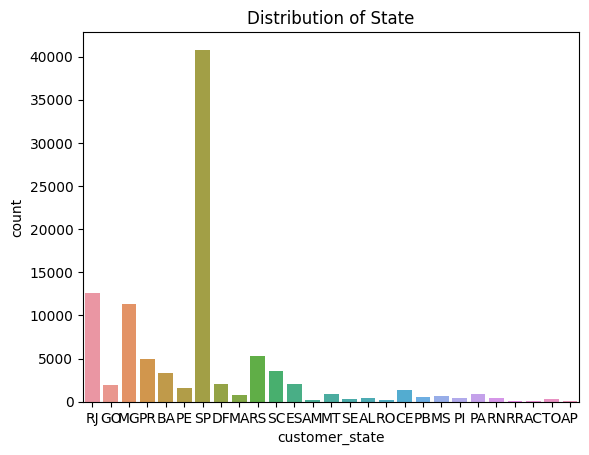

In [47]:
# See the distribution of customer state to recognise different distributions
sns.countplot(x='customer_state', data=all)
plt.title('Distribution of State')

Text(0.5, 0, 'Time of purchase')

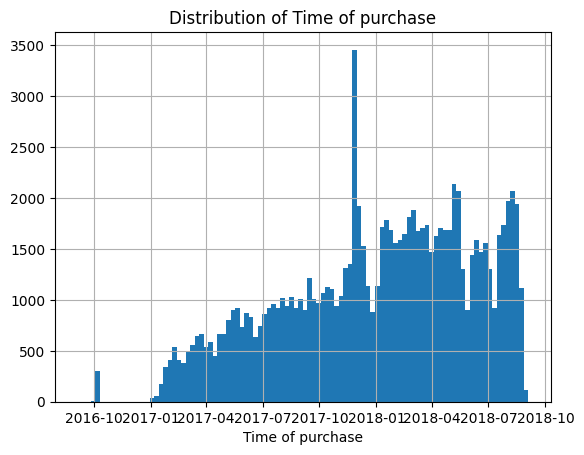

In [48]:
# Create a histogram of times of purchases
all.hist('order_purchase_timestamp', bins=100)
plt.title('Distribution of Time of purchase')
plt.xlabel('Time of purchase')

Text(0.5, 0, 'Price')

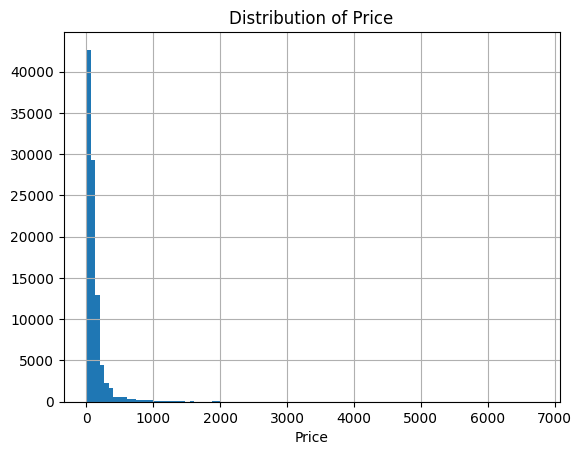

In [49]:
# Create a histogram of prices
all.hist('price', bins=100)
plt.title('Distribution of Price')
plt.xlabel('Price')

#all.loc[[2],'price']

Text(0.5, 0, 'Zip code')

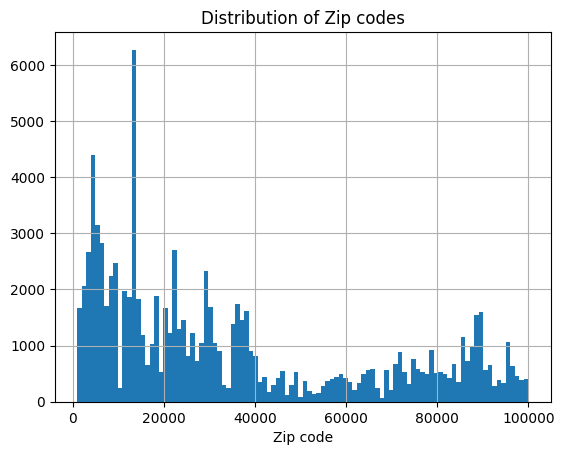

In [50]:
# Create a histogram of zip codes
all.hist('customer_zip_code_prefix', bins=100)
plt.title('Distribution of Zip codes')
plt.xlabel('Zip code')

Text(0.5, 1.0, 'Distribution of Payment type')

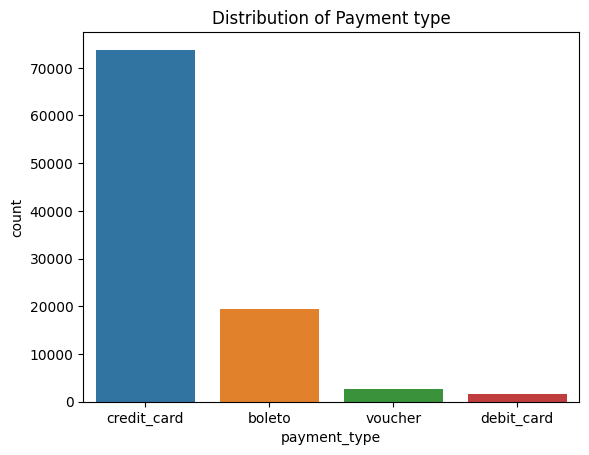

In [51]:
# The distribution of payment type
sns.countplot(x='payment_type', data=all)
plt.title('Distribution of Payment type')

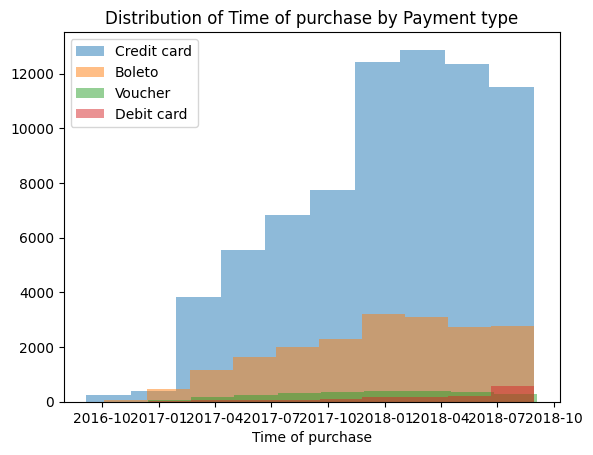

In [52]:
# Histogram of Time of purchase by Payment type
plt.hist('order_purchase_timestamp', data=all[all['payment_type'] == 'credit_card'], alpha=0.5, label='Credit card')
plt.hist('order_purchase_timestamp', data=all[all['payment_type'] == 'boleto'], alpha=0.5, label='Boleto')
plt.hist('order_purchase_timestamp', data=all[all['payment_type'] == 'voucher'], alpha=0.5, label='Voucher')
plt.hist('order_purchase_timestamp', data=all[all['payment_type'] == 'debit_card'], alpha=0.5, label='Debit card')
plt.title('Distribution of Time of purchase by Payment type')
plt.xlabel('Time of purchase')
plt.legend()

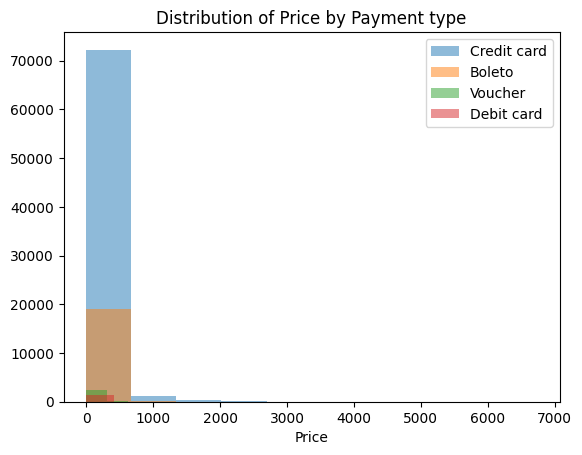

In [53]:
# Histogram of Price by Payment type
plt.hist('price', data=all[all['payment_type'] == 'credit_card'], alpha=0.5, label='Credit card')
plt.hist('price', data=all[all['payment_type'] == 'boleto'], alpha=0.5, label='Boleto')
plt.hist('price', data=all[all['payment_type'] == 'voucher'], alpha=0.5, label='Voucher')
plt.hist('price', data=all[all['payment_type'] == 'debit_card'], alpha=0.5, label='Debit card')
plt.title('Distribution of Price by Payment type')
plt.xlabel('Price')
plt.legend()

Text(0.5, 1.0, 'Scatter Plot correlating Zip code to Price')

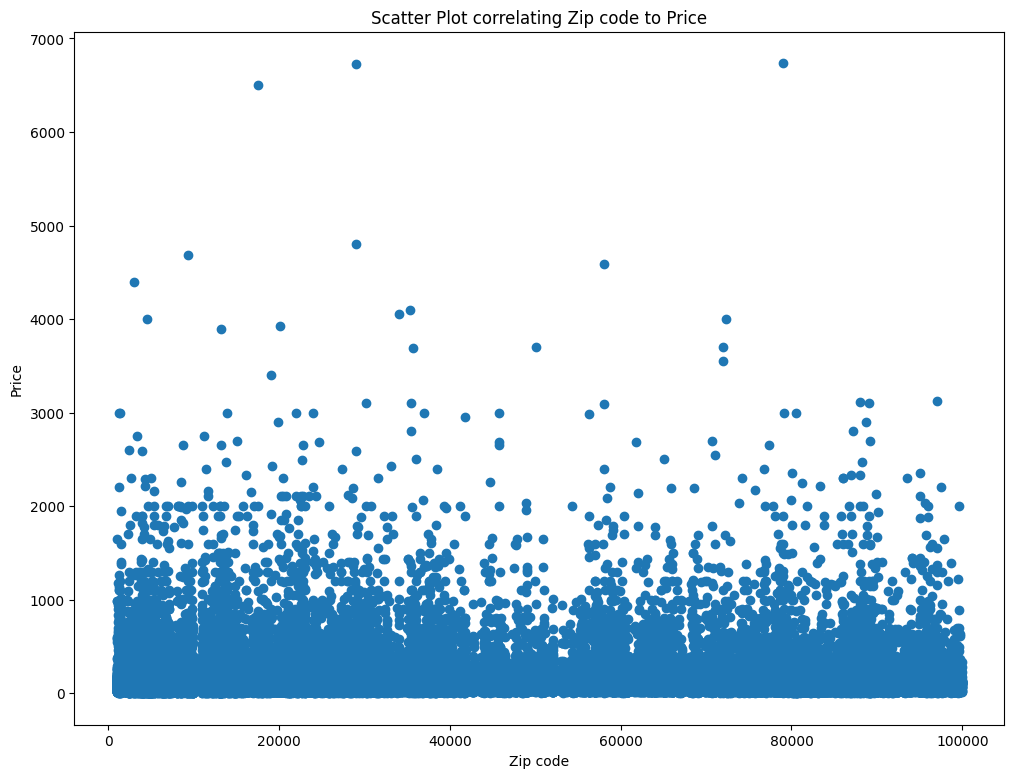

In [54]:
plt.figure(figsize=(12,9))
plt.scatter(all['customer_zip_code_prefix'],all['price'])
plt.xlabel('Zip code')
plt.ylabel('Price')
plt.title('Scatter Plot correlating Zip code to Price')

# Price does not look normally distributed, there are outliers with high values (higher than 6000).

Text(0.5, 1.0, 'Distribution of Products')

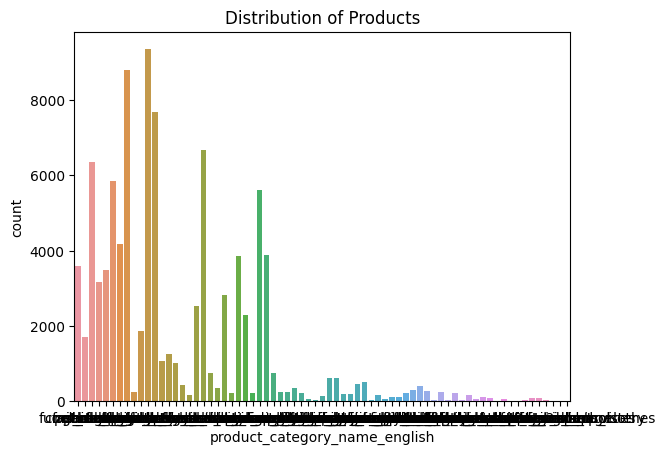

In [55]:
sns.countplot(x='product_category_name_english', data=all)
plt.title('Distribution of Products')

In [56]:
#We still need to derive some data - use some features like group by, pivot, melt and also some simple statistics such as mean, std, or even your own had written ones, to derive some new values such as moving averages, correlations etc.
#We still need to clean and prepare the data (replace NaN, generate new data, use Imputers, etc.) - do normalisation/standardisation and/or quality control???

all

,order_id,product_id,price,product_category_name_english,payment_type,customer_id,order_purchase_timestamp,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,credit_card,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,28013,campos dos goytacazes,RJ
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,55.9,cool_stuff,boleto,e6eecc5a77de221464d1c4eaff0a9b64,2017-06-28 11:52:20,75800,jatai,GO
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,64.9,cool_stuff,credit_card,4ef55bf80f711b372afebcb7c715344a,2018-05-18 10:25:53,30720,belo horizonte,MG
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,credit_card,30407a72ad8b3f4df4d15369126b20c9,2017-08-01 18:38:42,83070,sao jose dos pinhais,PR
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,credit_card,91a792fef70ecd8cc69d3c7feb3d12da,2017-08-10 21:48:40,36400,conselheiro lafaiete,MG
...,...,...,...,...,...,...,...,...,...,...
115873,ffebd80e3291e811c308365936897efd,4cc4d02efc8f249c13355147fb44e34d,129.9,garden_tools,credit_card,050309b91cc5e04e68841938e7984aaf,2018-07-13 20:04:05,28740,conceicao de macabu,RJ
115874,ffee31fb4b5e35c9123608015637c495,b10ecf8e33aaaea419a9fa860ea80fb5,99.0,furniture_decor,credit_card,11e0f43ab4e2d2c48348dd9332c0ef80,2018-08-18 10:00:59,83065,sao jose dos pinhais,PR
115875,fff7c4452f050315db1b3f24d9df5fcd,dd469c03ad67e201bc2179ef077dcd48,736.0,watches_gifts,credit_card,dec8952e97ef6124259c56914fb3569c,2017-06-01 16:53:03,27261,volta redonda,RJ
115876,fffa82886406ccf10c7b4e35c4ff2788,bbe7651fef80287a816ead73f065fc4b,229.9,sports_leisure,credit_card,a5201e1a6d71a8d21e869151bd5b4085,2017-12-18 16:33:07,59955,tenente ananias,RN


## Creating the narrative of our story
- Background, context: We are exploring and analysing a dataset of 100k orders made at Olist Store, from 2016 to 2018, made at multiple marketplaces in Brazil. 
- Sources of data: The dataset is composed of 6 tables (csv files) about customers, orders, payments, and products, which include different types of data, such as time series and geographical.
- Hypotheses: Our hypothesis is related to customer segmentation: analyse customer demographics, such as city, to segment the customer database to identify top performing cities. This analysis can improve customer targeting.
- Supporting the hypotheses: We are going to support our hypothesis by using three charts: a map showing the distribution of orders to find the best performing cities; one showing the times of purchases to find some trends; and one pie chart showing the payment types to see what people are paying with the most.

In [57]:
#pd.to_datetime(all['order_purchase_timestamp'], format = "%Y-%m-%d")
all['order_purchase_day'] = all['order_purchase_timestamp'].dt.round('1d')

In [58]:
# table for the map with the distribution of orders
all[['order_id','price','customer_zip_code_prefix','customer_city','customer_state']].to_csv('map.csv')
# table for the days of purchases
all[['order_id','price','order_purchase_day']].to_csv('day.csv')
# table for the times of purchases
all[['order_id','price','order_purchase_timestamp']].to_csv('time.csv')
# table for the pie chart with the payment types
all[['order_id','price','payment_type','customer_zip_code_prefix','customer_city','customer_state']].to_csv('payment.csv')

https://www.independent.co.uk/news/world/black-friday-2017-brazil-shoppers-discount-sales-brazil-south-africa-a8073651.html